<a href="https://colab.research.google.com/github/saspav/python_for_pro/blob/main/HW_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='green' size='6'>**Домашняя работа 1**</font>  
<font color='#11a642' size='5'>**Тема: Машинное обучение**</font>  
<font size='5'>**Задание:**</font>  

Домашняя работа основана на данных о стоимости недвижимости.

**Описание данных:**

| Признак     | Описание                                                 |
|-------------|-----------------------------------------------------------|
| MedInc      | Средний доход домохозяйства (в десятках тысяч долларов)  |
| HouseAge    | Средний возраст домов в районе                           |
| AveRooms    | Среднее количество комнат на дом                         |
| AveBedrms   | Среднее количество спален на дом                         |
| Population  | Население района                                         |
| AveOccup    | Среднее количество человек на дом                        |

- target - стоимость недвижимости, что и нужно вам предсказать (это и есть целевой признак)

**Что нужно сделать:**

1. Проведите разведочный анализ данных (EDA)

2. Заполнить пропуски любыми 2 способами, что обсуждали на лекции. Объясните свой выбор

3. Построите модель линейной регрессии c помощью LinearRegression.

4. Оцените качество моделей. Выберите ту модель+метод заполнения пропусков, который даёт наилучший результат, и обоснуйте свой выбор.







# <font color='#11a642' size='6'> **Импорт и установка библиотек**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import HuberRegressor, LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error

__import__("warnings").filterwarnings('ignore')

In [ ]:
def calc_metrics(model,
                 data: pd.DataFrame,
                 y_true: pd.Series,
                 type_sample: str
                 ) -> dict:
    """
    Вычисляет базовые регрессионные метрики на обучающей выборке.

    Метрики:
    - MAE (Mean Absolute Error)
    - RMSE (Root Mean Squared Error)
    - MAPE (Mean Absolute Percentage Error)
    - SMAPE (Symmetric Mean Absolute Percentage Error)

    Параметры:
    ----------
    model :  Обученная регрессионная модель.
    data : pd.DataFrame | np.ndarray  Признаки выборки.
    y_true : pd.Series | np.ndarray  Целевая переменная (фактическое значение)
    type_sample: название выборки
    Возвращает:
    -----------
    dict_metrics :  Словарь с названиями метрик и их значениями.
    """
    y_pred = model.predict(data)

    # Метрики
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    smape = 100 * np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

    dict_metrics = {'metrics': ['mae', 'rmse', 'mape', 'smape'],
                    type_sample: [mae, rmse, mape, smape]}

    return dict_metrics


def train_model(model_class, type_sample: str,
                X_tr: pd.DataFrame, X_val: pd.DataFrame,
                y_tr: pd.Series, y_val: pd.Series) -> pd.DataFrame:
    """
    Обучение модели, получение предсказаний и метрик
    :param model_class: класс модели
    :param type_sample: тип данных
    :param X_tr: тренировочная выборка
    :param X_val: валидационная выборка
    :param y_tr: тренировочный целевой признак
    :param y_val: валидационный целевой признак
    :return: ДФ с метриками
    """
    # Инициализация скейлера
    scaler = StandardScaler()
    # Обучение скейлера на тренировочных данных
    X_tr_scaled = scaler.fit_transform(X_tr)
    # Применение к валидационной выборке
    X_val_scaled = scaler.transform(X_val)
    # Создание и обучение модели линейной регрессии
    model = model_class()
    model.fit(X_tr_scaled, y_tr)
    result_name = (f'{model_class.__name__}_{type_sample}'
                   .replace('LinearRegression', 'LinReg')
                   .replace('HuberRegressor', 'Huber'))
    metrics = pd.DataFrame(calc_metrics(model, X_val_scaled, y_val, result_name))
    return metrics.set_index('metrics')

# <font color='#11a642' size='6'> **Загрузка данных**

In [ ]:
# 1. Загрузка датасета
try:
    url = 'https://drive.google.com/uc?export=download&id=1yQgwqFxwkHtZl2PZ2waF4Pg3Sb9hyHo9'
    df = pd.read_csv(url)
except:
    df = pd.read_csv('df_with_nan.csv')

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Target
0,8.3252,41.0,6.984127,1.023810,322,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565,2.181467,3.422


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20629 non-null  float64
 1   HouseAge    20629 non-null  float64
 2   AveRooms    20625 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  int64  
 5   AveOccup    20640 non-null  float64
 6   Target      20640 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.1 MB


In [ ]:
# 2. Разделение признаков и целевой переменной
X = df.drop('Target', axis=1)
y = df['Target']

In [ ]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Target, dtype: float64

# <font color='#11a642' size='6'> **Разведочный анализ данных**

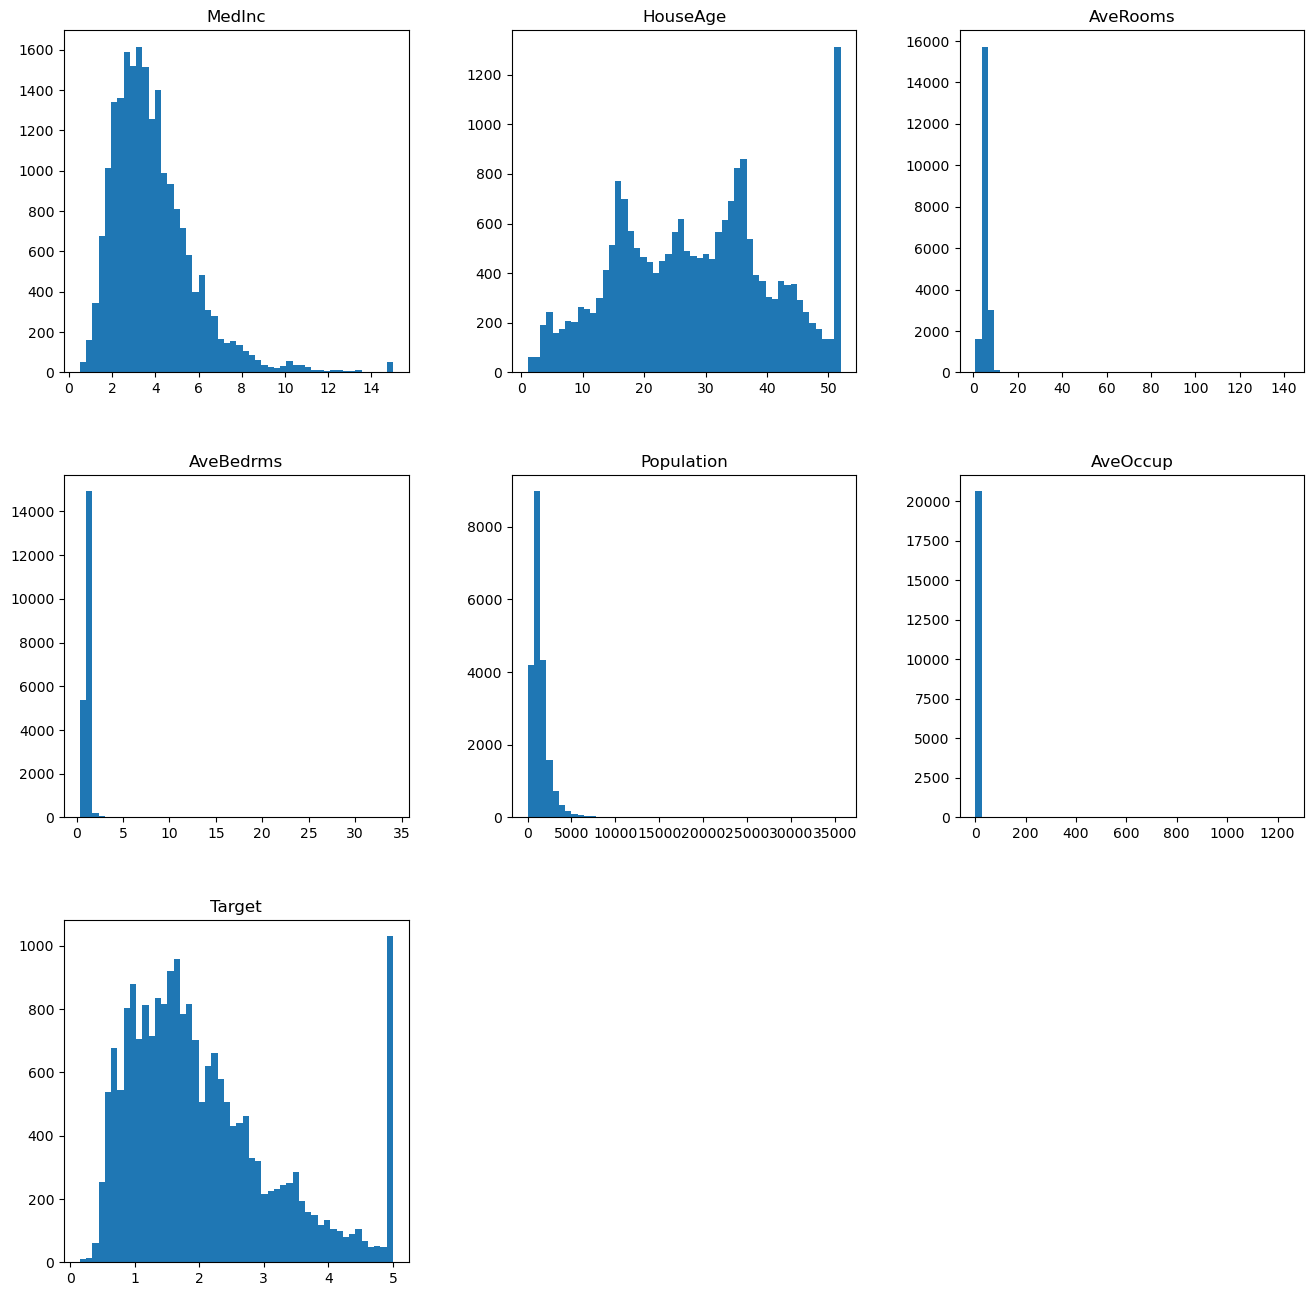

In [ ]:
# строим распределение каждого из признаков
df.hist(figsize=(16,16), bins=50, grid=False);

Возможно есть выбросы в HouseAge и целевой переменной.

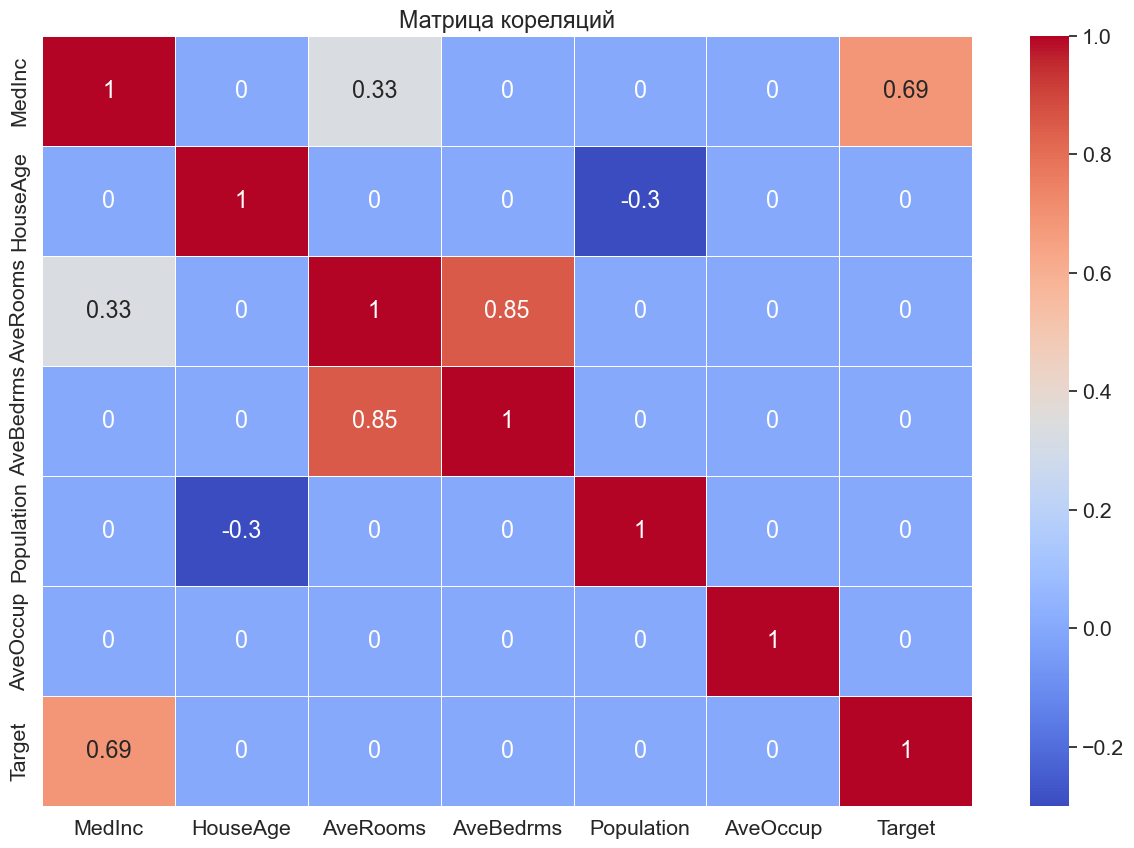

In [ ]:
plt.figure(figsize = (15,10))

sns.set_theme(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Матрица кореляций')
plt.show()

- Есть сильная корреляция между количеством комнат и количеством спален - что логично.
- Есть корреляцие между Средним доходом домохозяйств и Целевой переменной: стоимостью недвижимости

## <font color='#11a642' size='5'> Оцените размер вашего датасета


1.   Сколько ГБ ваш датасет
2.   Сколько строк и столбцов



In [ ]:
# Сколько ГБ ваш датасет
df.memory_usage(deep=True).sum() / 1024 ** 3

0.001076582819223404

In [ ]:
# Сколько строк и столбцов
df.shape

(20640, 7)

## <font color='#11a642' size='5'> Анализ числовых (непрерывных) признаков


- для каждого признака посчитайте минимум, максимум, среднее, медиану

In [ ]:
# Можно просто описательные статистики посмотреть
df.describe().loc[['min', 'max', 'mean', '50%']].rename({'50%': 'median'})

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Target
min,0.499900,1.00000,0.846154,0.333333,3.000000,0.692308,0.149990
max,15.000100,52.00000,141.909091,34.066667,35682.000000,1243.333333,5.000010
mean,3.870444,28.62766,5.428796,1.096675,1425.476744,3.070655,2.068558
median,3.534900,29.00000,5.228856,1.048780,1166.000000,2.818116,1.797000


In [ ]:
# Или вывести требуемые статистики
n = 4
for col in df.columns:
    print(f'Признак: {col}, минимум: {round(df[col].min(),n)}, максимум: {round(df[col].max(),n)},',
          f'среднее {round(df[col].mean(),n)}, медиана: {round(df[col].median(),n)}')

Признак: MedInc, минимум: 0.4999, максимум: 15.0001, среднее 3.8704, медиана: 3.5349
Признак: HouseAge, минимум: 1.0, максимум: 52.0, среднее 28.6277, медиана: 29.0
Признак: AveRooms, минимум: 0.8462, максимум: 141.9091, среднее 5.4288, медиана: 5.2289
Признак: AveBedrms, минимум: 0.3333, максимум: 34.0667, среднее 1.0967, медиана: 1.0488
Признак: Population, минимум: 3, максимум: 35682, среднее 1425.4767, медиана: 1166.0
Признак: AveOccup, минимум: 0.6923, максимум: 1243.3333, среднее 3.0707, медиана: 2.8181
Признак: Target, минимум: 0.15, максимум: 5.0, среднее 2.0686, медиана: 1.797


## <font color='#11a642' size='5'> Анализ пропусков


In [ ]:
df.isna().sum()

MedInc        11
HouseAge      11
AveRooms      15
AveBedrms      0
Population     0
AveOccup       0
Target         0
dtype: int64

In [ ]:
!pip install missingno >> _

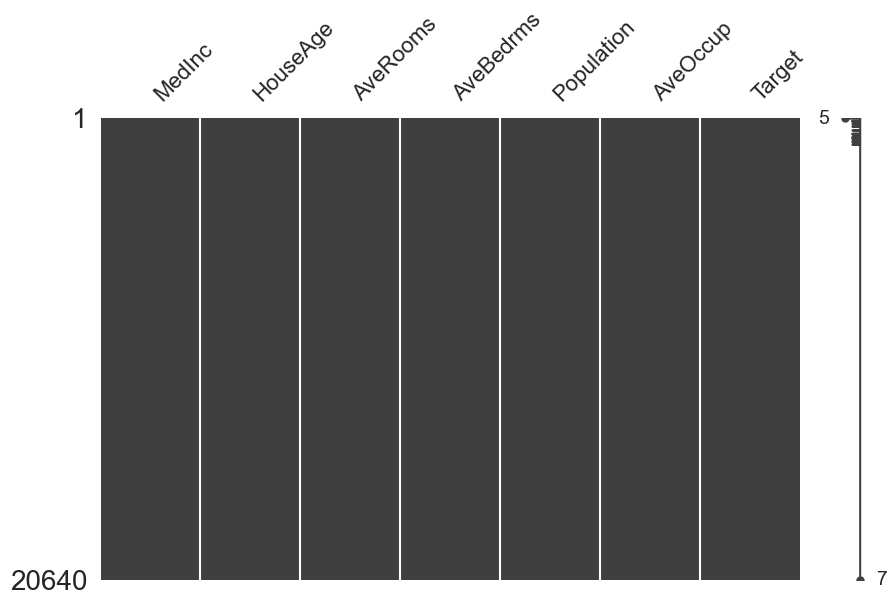

In [ ]:
try:
    import missingno as msno

    msno.matrix(df, figsize=(10, 6));
except:
    ...

Данная картинка никак нам не помогла в анализе пропусков

# <font color='#11a642' size='6'> **Разделите данные на трейн и тест**

In [ ]:
train, valid, X_train, X_valid, y_train, y_valid = train_test_split(df, X, y,
                                                                    test_size=0.2,
                                                                    random_state=127)

# <font color='#11a642' size='6'> **Подготовка данных к обучению**



1. Обработка пропусков любыми 2 способами, изученных на лекции




In [ ]:
# Список колонок с пропусками
cols_with_nulls = df.isnull().any()
columns_with_nulls = cols_with_nulls[cols_with_nulls].index.tolist()
print('\nКолонки с пропусками:', columns_with_nulls)

# Считаем среднее по пропущенным колонкам
mean_train = X_train[columns_with_nulls].mean()
# Считаем медиану по пропущенным колонкам
median_train = X_train[columns_with_nulls].median()

# Создаем копии тренировочных и валидационных данных
X_train_mean, X_valid_mean = X_train.copy(), X_valid.copy()
X_train_median, X_valid_median = X_train.copy(), X_valid.copy()

# Заполняем пропуски средним
X_train_mean[columns_with_nulls] = X_train_mean[columns_with_nulls].fillna(mean_train)
X_valid_mean[columns_with_nulls] = X_valid_mean[columns_with_nulls].fillna(mean_train)

# Заполняем пропуски медианой
X_train_median[columns_with_nulls] = X_train_median[columns_with_nulls].fillna(median_train)
X_valid_median[columns_with_nulls] = X_valid_median[columns_with_nulls].fillna(median_train)

# Заполнение пропусков моделью линейной регрессии
imputer = IterativeImputer(estimator=LinearRegression(), random_state=127)
train_imputed = pd.DataFrame(imputer.fit_transform(train),
                             columns=df.columns).drop(columns=['Target'])
valid_imputed = pd.DataFrame(imputer.transform(valid),
                             columns=df.columns).drop(columns=['Target'])


Колонки с пропусками: ['MedInc', 'HouseAge', 'AveRooms']


# <font color='#11a642' size='6'> **Построение моделей машинного обучения**

## <font color='#11a642' size='5'> Построение линейной регрессии с помощью LinearRegression


### Для экспериментов возьмем 3 линейные модели: LinearRegression, HuberRegressor, ElasticNet

In [ ]:
result = None  # датафрейм с результатами
# Создание и обучение модели линейной регрессии
for cls_model, data in product(
        (LinearRegression, HuberRegressor, ElasticNet),
        (('mean', X_train_mean, X_valid_mean),
         ('median', X_train_median, X_valid_median),
         ('impute', train_imputed, valid_imputed)
         ), ):
    # Получаем результаты одной модели для заданных данных
    temp = train_model(cls_model, *data, y_train, y_valid)
    # Добавляем результаты в итоговый датафрейм
    if result is None:
        result = temp
    else:
        result = pd.concat([result, temp], axis=1)

### <font color='#11a642' size='4'> Оценка качества  всех моделей


In [ ]:
result

,LinReg_mean,LinReg_median,LinReg_impute,Huber_mean,Huber_median,Huber_impute,ElasticNet_mean,ElasticNet_median,ElasticNet_impute
metrics,,,,,,,,,
mae,0.577750,0.577823,0.577064,0.554847,0.554902,0.554009,0.817294,0.817320,0.817159
rmse,0.780732,0.780835,0.780097,0.854870,0.855372,0.854558,1.039530,1.039559,1.039428
mape,35.208803,35.213560,35.165564,31.518579,31.522825,31.473621,54.118294,54.120087,54.111846
smape,29.851308,29.854606,29.812745,28.116524,28.117757,28.067023,40.731116,40.732250,40.724985


In [ ]:
# Находим модель с минимальным значением по каждой метрике
best_models = result.idxmin(axis=1)
best_models

metrics
mae       Huber_impute
rmse     LinReg_impute
mape      Huber_impute
smape     Huber_impute
dtype: object

In [ ]:
best_model = best_models.value_counts().idxmax()
print('Итоговая модель:', best_model)

Итоговая модель: Huber_impute


# <font color='#11a642' size='4'> Ваши выводы
- какую из моделей вы рекомендуете использовать для прогноза? Почему?



- Модель HuberRegressor показала лучшие результаты по MAE и MAPE, что говорит о её устойчивости к выбросам.
- Модель ElasticNet с настройками по умолчанию разочаровала, т.к. выдала результаты хуже всех.
- Заполнение пропусков через IterativeImputer дало небольшое улучшение метрик по сравнению со средним и медианой для обеих моделей.
- Заполнение пропусков средним значением лучше, чем медианой на данном датасете.

# <font color='#11a642' size='4'> Проведем дополнительные опыты:
- Оставим один из двух сильно коррелированных признаков AveRooms и AveBedrms
- Сделаем комбинацию из этих двух признаков

In [ ]:
# Добавим новый признак как отношение 'AveRooms' к 'AveBedrms'
train_imputed['ratio_rooms'] = train_imputed['AveRooms'] / train_imputed['AveBedrms']
valid_imputed['ratio_rooms'] = valid_imputed['AveRooms'] / valid_imputed['AveBedrms']

result2 = None  # датафрейм с результатами
# Создание и обучение модели линейной регрессии
one_features = {'AveRooms', 'AveBedrms', 'ratio_rooms'}
for name_feature in one_features:
    # Список двух других колонок для удаления
    drop_cols = list(one_features - {name_feature})
    # Получаем результаты одной модели для заданных данных
    temp = train_model(HuberRegressor, name_feature,
                       train_imputed.drop(columns=drop_cols),
                       valid_imputed.drop(columns=drop_cols),
                       y_train, y_valid)
    # Добавляем результаты в итоговый датафрейм
    if result2 is None:
        result2 = temp
    else:
        result2 = pd.concat([result2, temp], axis=1)

In [ ]:
result2

,Huber_ratio_rooms,Huber_AveBedrms,Huber_AveRooms
metrics,,,
mae,0.550019,0.589925,0.583021
rmse,0.852868,0.903478,0.919761
mape,31.077991,34.142421,33.725349
smape,27.828948,30.363424,30.042460


In [ ]:
# Находим модель с минимальным значением по каждой метрике
best_models2 = result2.idxmin(axis=1)
print(best_models2)

metrics
mae      Huber_ratio_rooms
rmse     Huber_ratio_rooms
mape     Huber_ratio_rooms
smape    Huber_ratio_rooms
dtype: object


In [ ]:
best_model2 = best_models2.value_counts().idxmax()
print('Итоговая модель:', best_model2)

Итоговая модель: Huber_ratio_rooms


# <font color='#11a642' size='4'> Сравним метрики двух лучших моделей:

In [ ]:
final_result = pd.concat([result[[best_model]], result2[[best_model2]]], axis=1)
final_result

,Huber_impute,Huber_ratio_rooms
metrics,,
mae,0.554009,0.550019
rmse,0.854558,0.852868
mape,31.473621,31.077991
smape,28.067023,27.828948


# <font color='#11a642' size='4'> Выводы 2:
- Удаление одного из признаков AveRooms или AveBedrms ухудшает качество модели.
- Замена признаков AveRooms и AveBedrms на их комбинацию улучшает качество модели по сравнению с наличием обоих признаков в данных.